In [45]:
using Plots
pyplot()

using FileIO
using JLD2
using Statistics

In [65]:
data_dir = normpath(joinpath(@__DIR__, "data",
                             "manipulation_with_unknown_parameters"));

In [66]:
data = load(joinpath(data_dir, "statistical_data_manipulation.jld2"));
data_tlqg = load(joinpath(data_dir, "statistical_data_tlqg_manipulation.jld2"));

In [69]:
cost_sacbp = data["cost_sacbp"]
cost_mcts = data["cost_mcts"]
cost_ilqg = data["cost_ilqg"]
cost_tlqg = data_tlqg["cost_tlqg"]
tcalc_sacbp = data["tcalc_sacbp"]
tcalc_mcts = data["tcalc_mcts"]
tcalc_ilqg = data["tcalc_ilqg"]
tcalc_tlqg_offline = data_tlqg["tcalc_tlqg_offline"]
tcalc_tlqg = data_tlqg["tcalc_tlqg"];
time_idx_array = data_tlqg["time_idx_array"];

In [70]:
# Plot Stats Data
cost_std_sacbp = [std([cost[ii] for cost in cost_sacbp]) for ii = 1:length(cost_sacbp[1])]
cost_std_mcts = [std([cost[ii] for cost in cost_mcts]) for ii = 1:length(cost_mcts[1])]
cost_std_ilqg = [std([cost[ii] for cost in cost_ilqg]) for ii = 1:length(cost_ilqg[1])];
cost_std_tlqg = [std([cost[ii] for cost in cost_tlqg]) for ii = 1:length(cost_tlqg[1])];

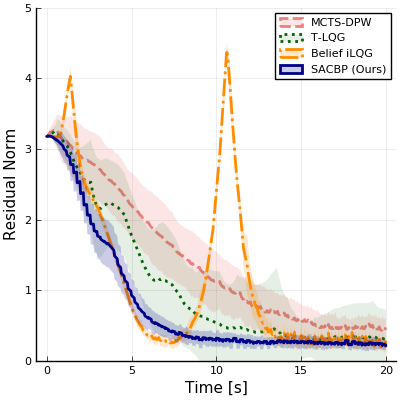

In [96]:
CostHistorySACBP = mean(cost_sacbp)
CostHistoryMCTS = mean(cost_mcts)
plot(time_idx_array[1][1:end-1],CostHistoryMCTS,label="MCTS-DPW",color=:lightcoral,ribbon=cost_std_mcts,fillalpha=0.2,linewidth=2.,linestyle=:dash);
CostHistoryiLQG = mean(cost_ilqg)
CostHistoryTLQGOnline = mean(cost_tlqg);
plot!(time_idx_array[1][1:end-1],CostHistoryTLQGOnline,label="T-LQG",color=:darkgreen,ribbon=cost_std_tlqg,fillalpha=0.1,linewidth=2.,linestyle=:dot)
plot!(time_idx_array[1][1:end-1],CostHistoryiLQG,label="Belief iLQG",color=:darkorange,ribbon=cost_std_ilqg,fillalpha=0.2,linewidth=2.,linestyle=:dashdot)
plot!(time_idx_array[1][1:end-1],CostHistorySACBP,label="SACBP (Ours)",color=:darkblue,ribbon=cost_std_sacbp,fillalpha=0.2,linewidth=2.,
      xlabel="Time [s]",ylabel="Residual Norm",size=(400,400),ylim=(0.,5.))

In [97]:
savefig(joinpath(data_dir, "manipulation_costs_with_tlqg.pdf"))

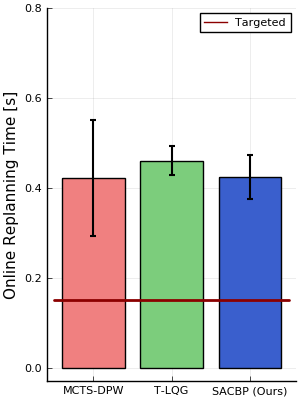

In [98]:
tcalcTrueArray = [tcalc_mcts,tcalc_tlqg,tcalc_sacbp]
meanTcalcTrueArray = mean.(tcalcTrueArray);
stdTcalcTrueArray = std.(tcalcTrueArray);

bar([1,2,3],meanTcalcTrueArray,yerror=stdTcalcTrueArray,linecolor=:black,marker=stroke(1.5,:black, :dash),c=[:lightcoral,:palegreen3,:royalblue3],label="");
xticks!([1,2,3],["MCTS-DPW","T-LQG","SACBP (Ours)"])
plot!([0.5,3.5],[3/4*0.2,3/4*0.2],width=2.,label="Targeted",size=(300,400),color=:darkred,ylim=(-0.03,0.8))
ylabel!("Online Replanning Time [s]")

In [99]:
savefig(joinpath(data_dir, "manipulation_time_with_tlqg.pdf"))

In [100]:
maximum(tcalc_tlqg_offline)

2.924971342086792

In [101]:
minimum(tcalc_tlqg_offline)

0.6484112739562988

In [102]:
mean(tcalc_tlqg_offline)

0.9711326070192481